# Exercise 4

#### Perform necessary preprocessing and check for outliers and multi-collinearity. Apply the same set of preprocessing to the test.csv and use the data to predict the house price. The evaluation criteria will be Root Mean Squared Error

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
train_path='house_pred.csv'
test_path='test.csv'

train_data=pd.read_csv(train_path)
test_data=pd.read_csv(test_path)

In [4]:
# Preprocessing Function
def preprocess_data(data):
    # Separate numerical and categorical features
    numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = data.select_dtypes(include=['object', 'category']).columns

    # Impute missing values
    num_imputer = SimpleImputer(strategy='mean')
    cat_imputer = SimpleImputer(strategy='most_frequent')

    data[numerical_cols] = num_imputer.fit_transform(data[numerical_cols])
    data[categorical_cols] = cat_imputer.fit_transform(data[categorical_cols])

    data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

    

    return data, numerical_cols, categorical_cols

# Preprocess train and test datasets
train_data, train_num_cols, train_cat_cols= preprocess_data(train_data)
test_data, test_num_cols, test_cat_cols= preprocess_data(test_data)

Outlier detection for training dataset:


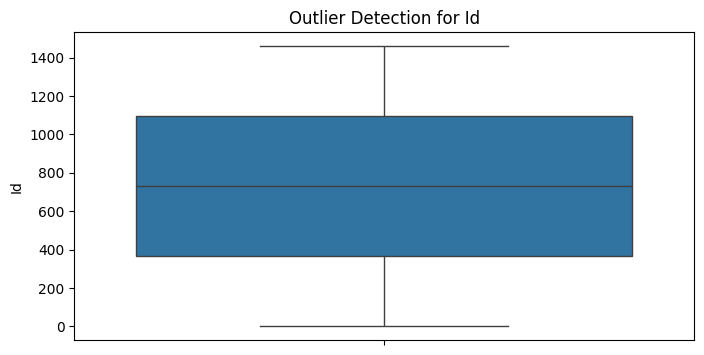

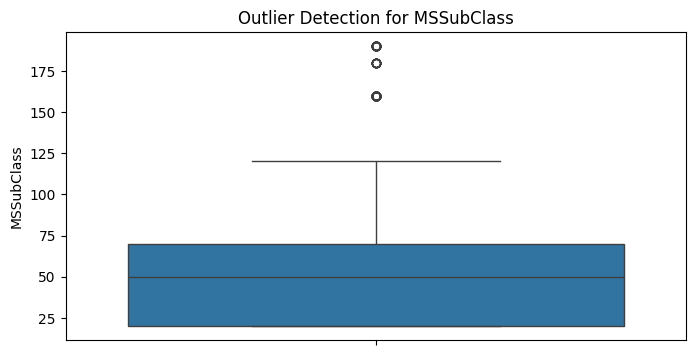

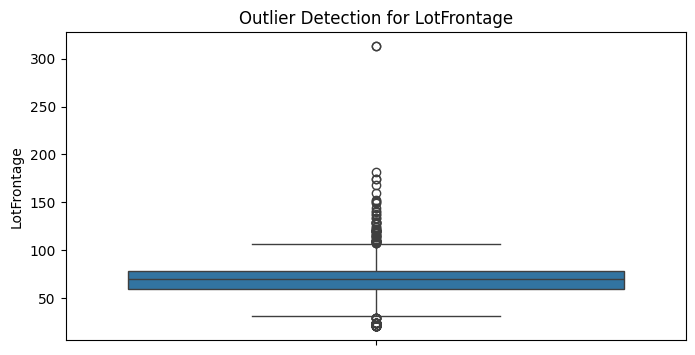

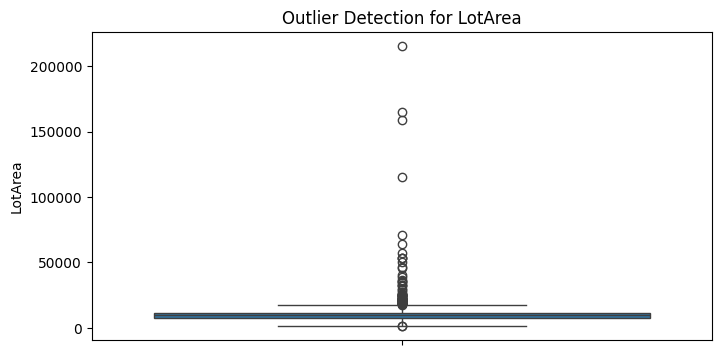

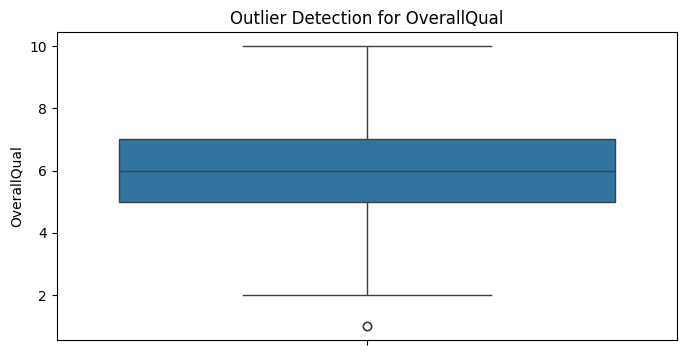

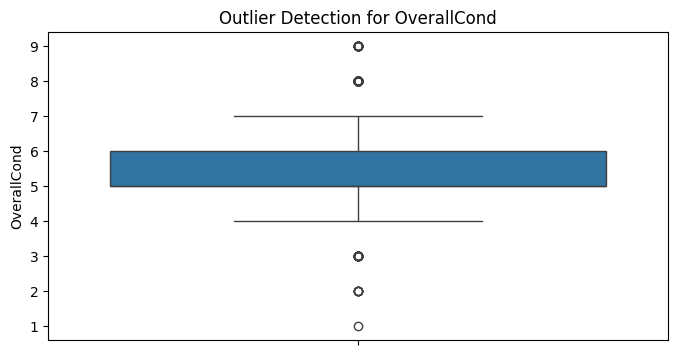

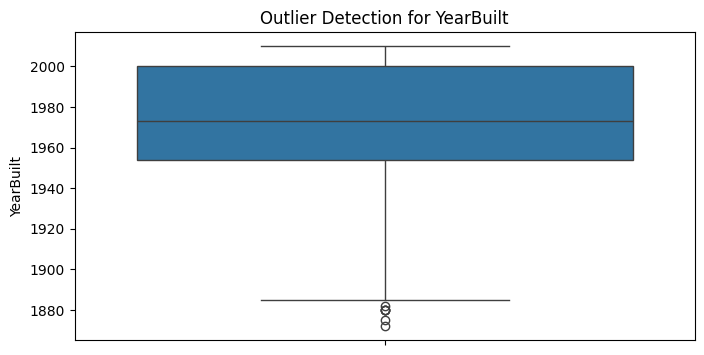

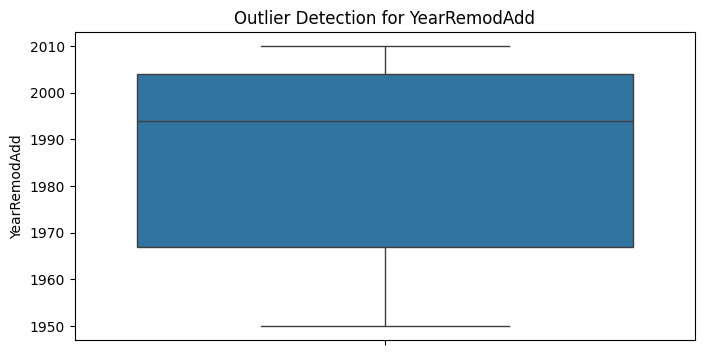

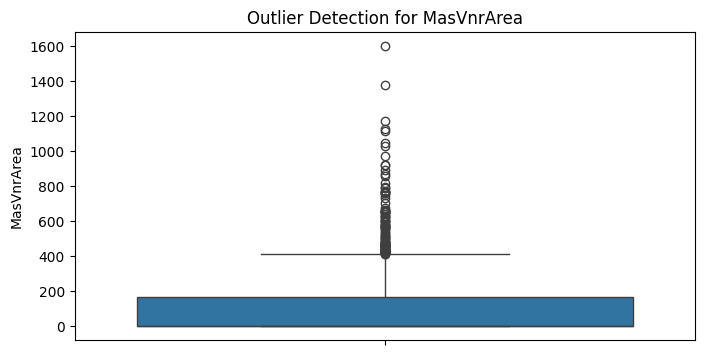

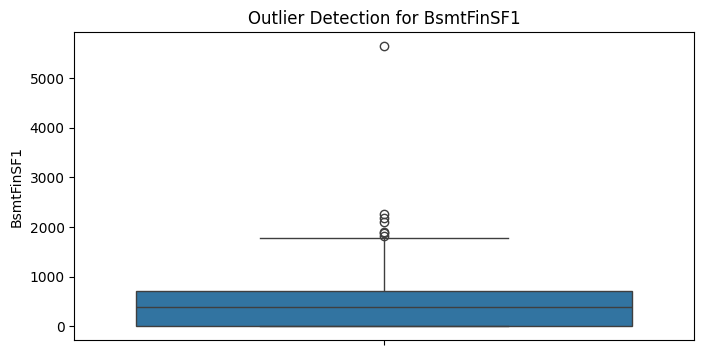

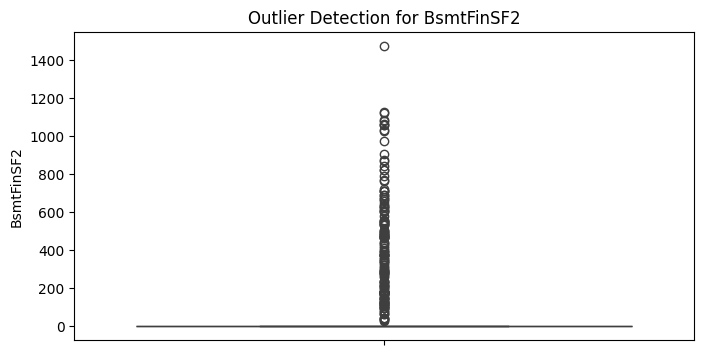

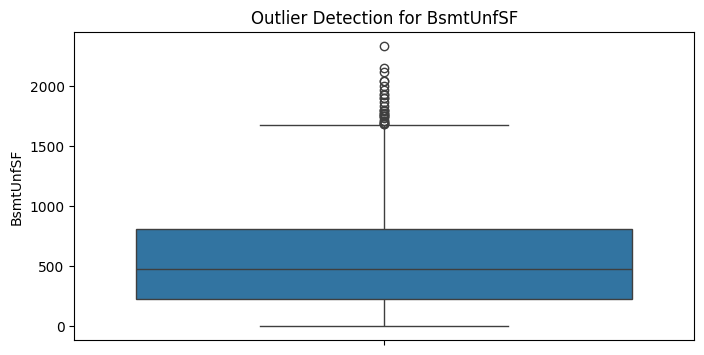

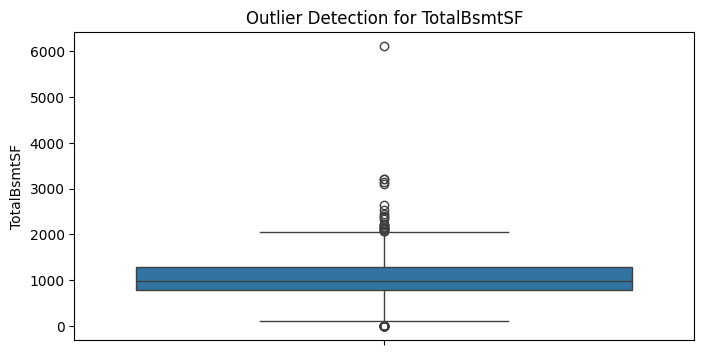

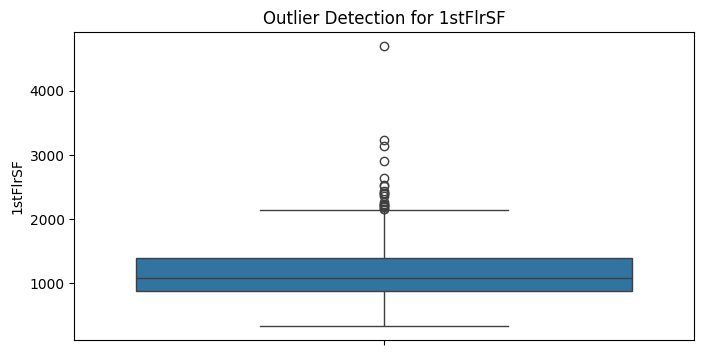

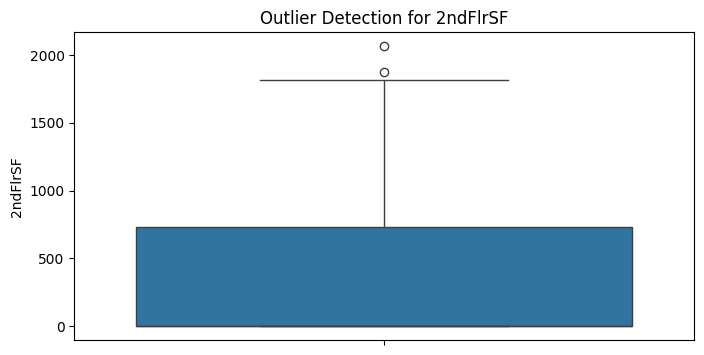

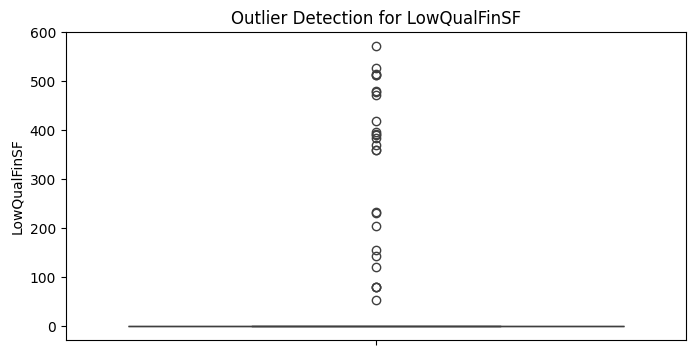

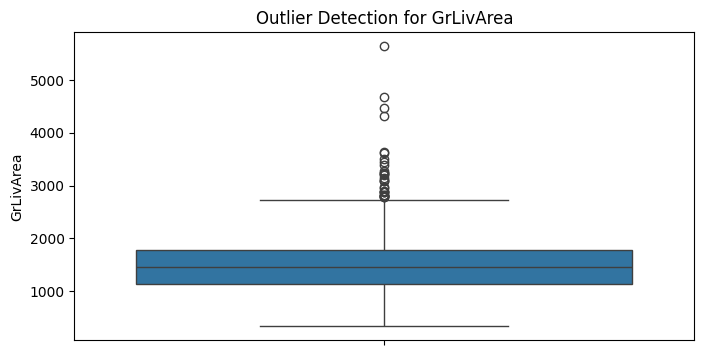

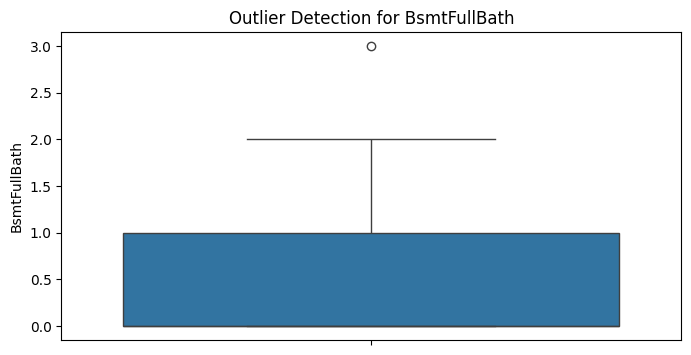

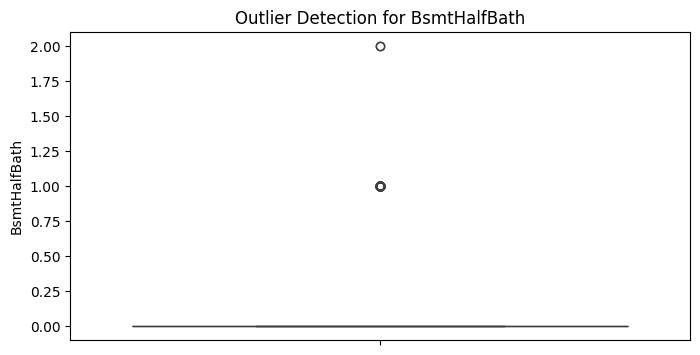

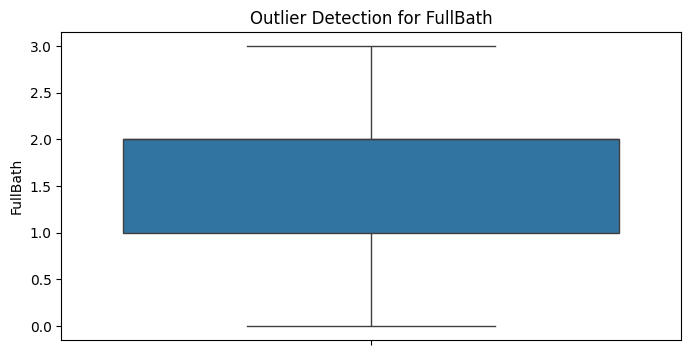

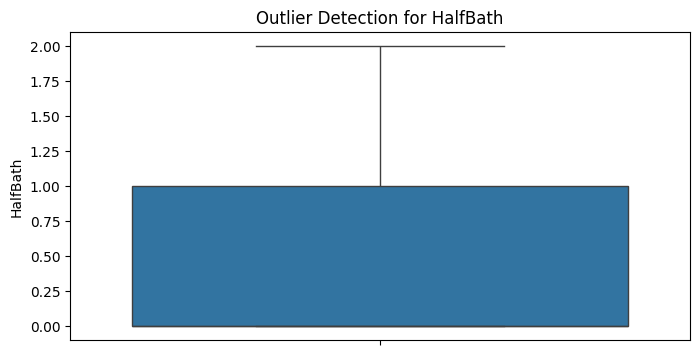

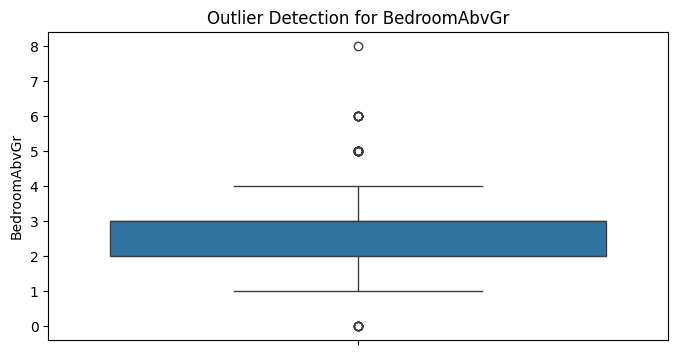

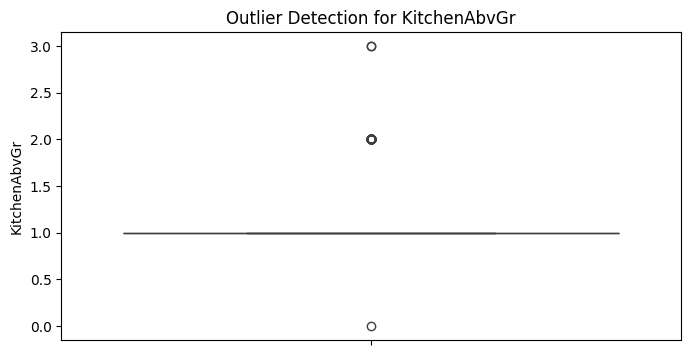

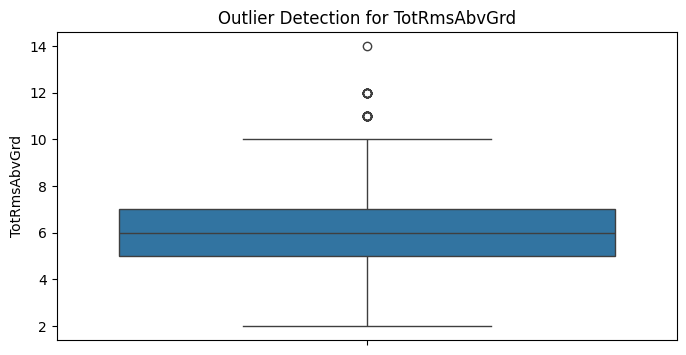

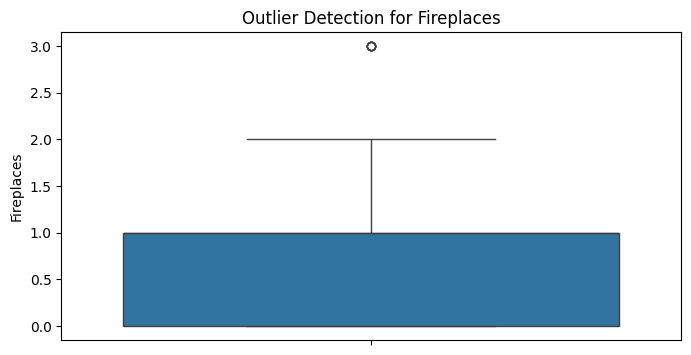

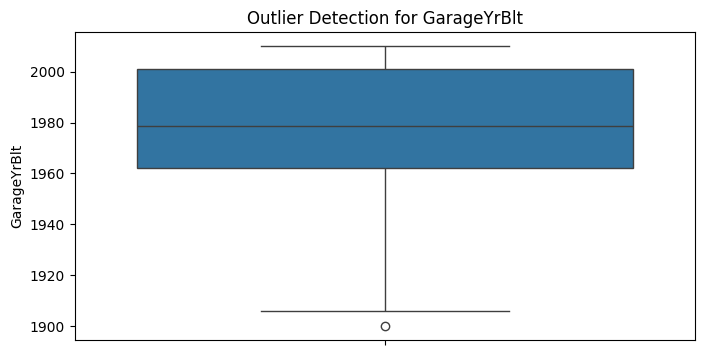

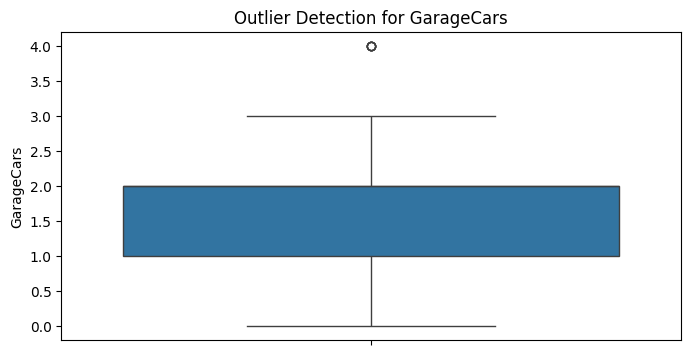

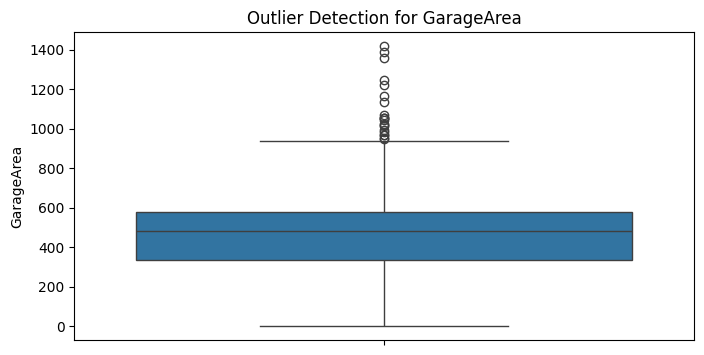

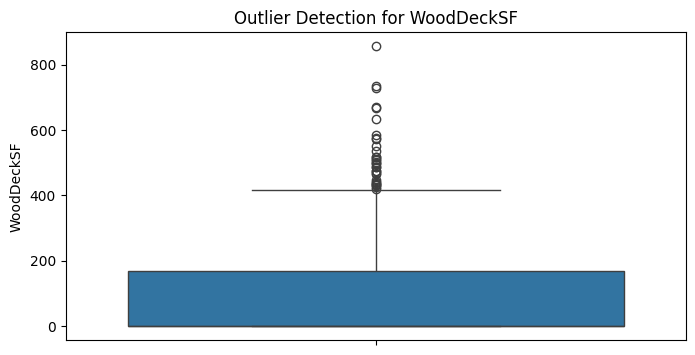

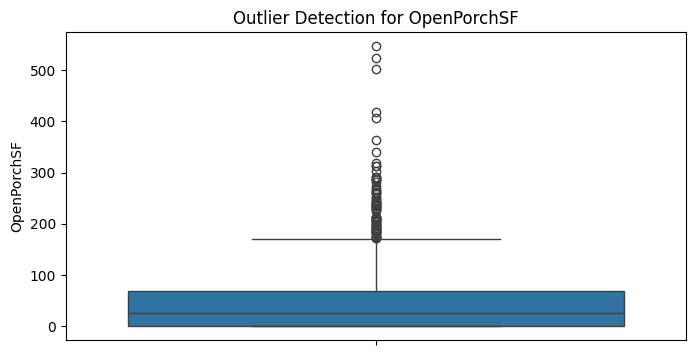

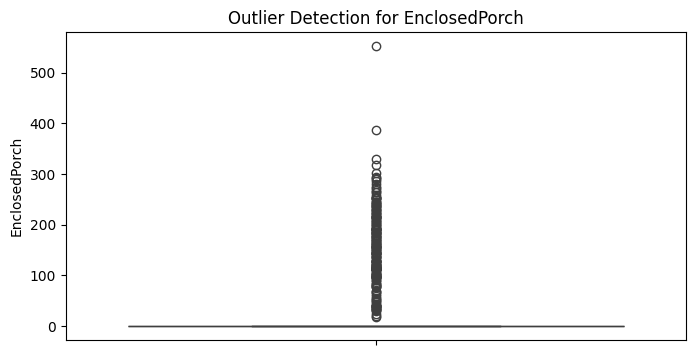

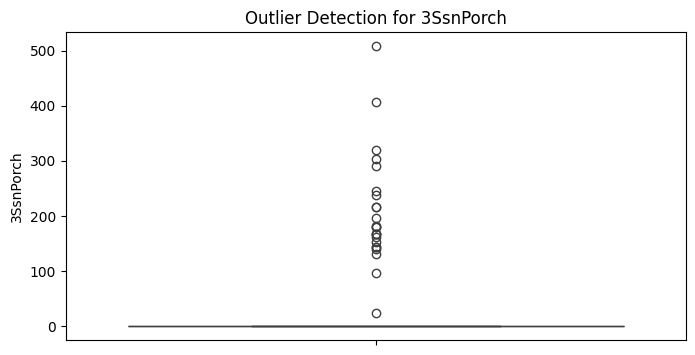

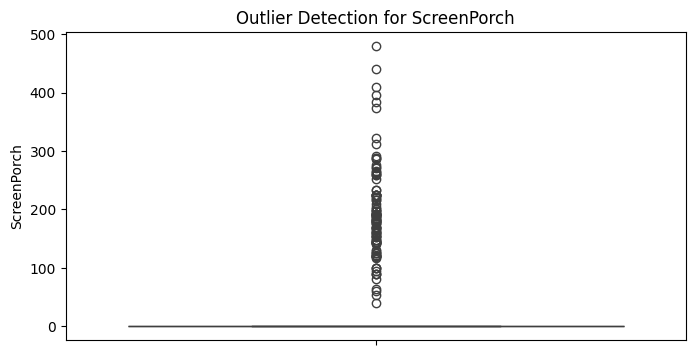

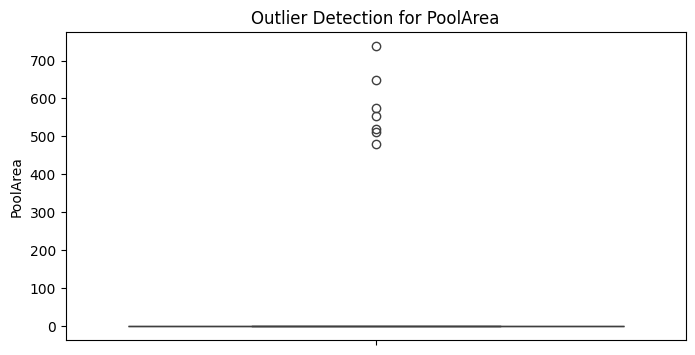

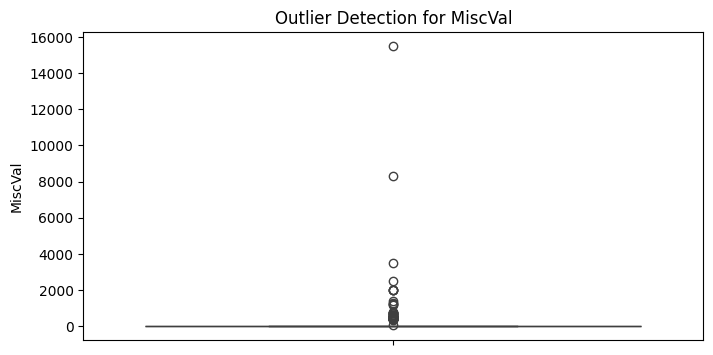

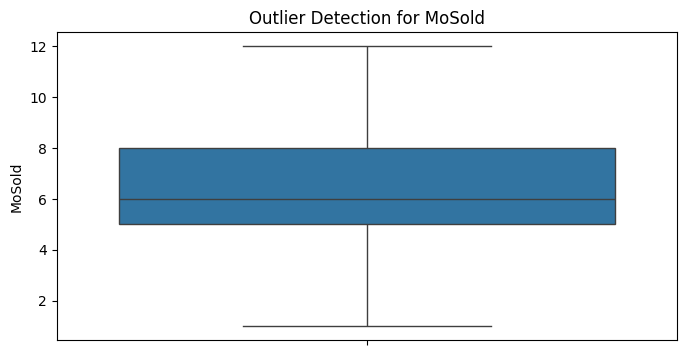

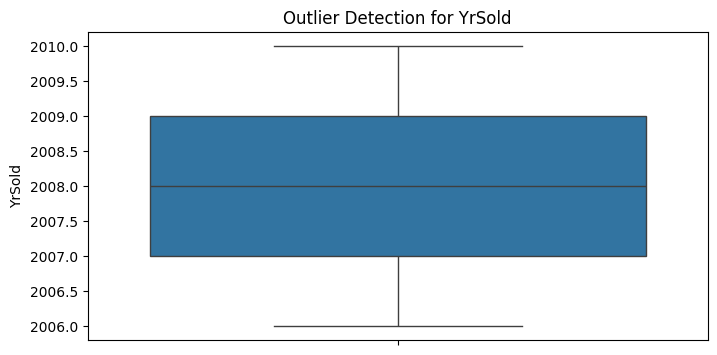

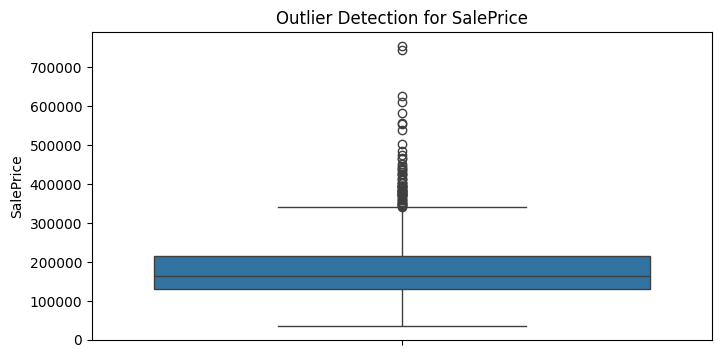

Outlier detection for test dataset:


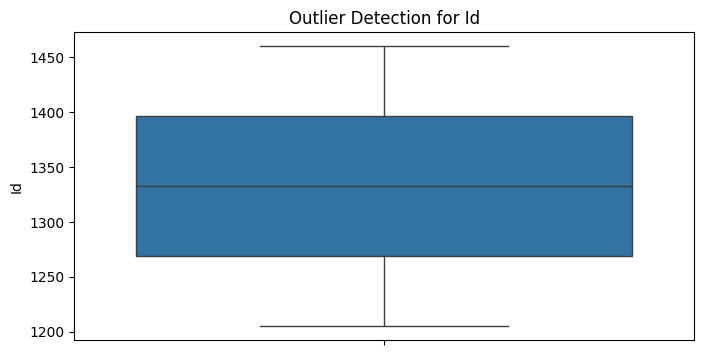

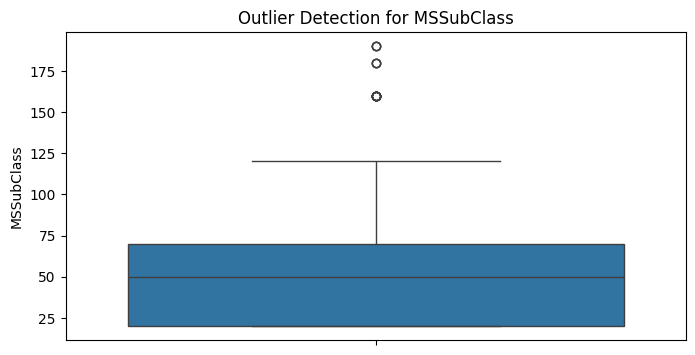

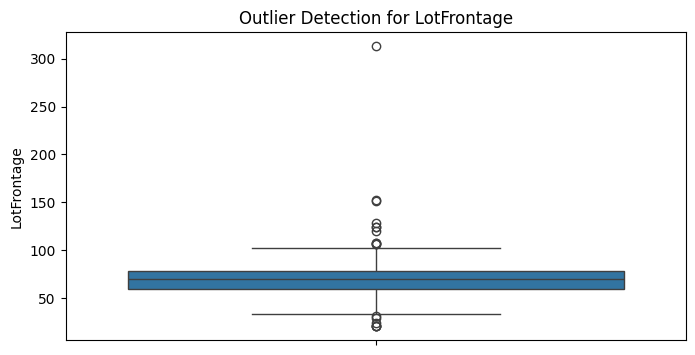

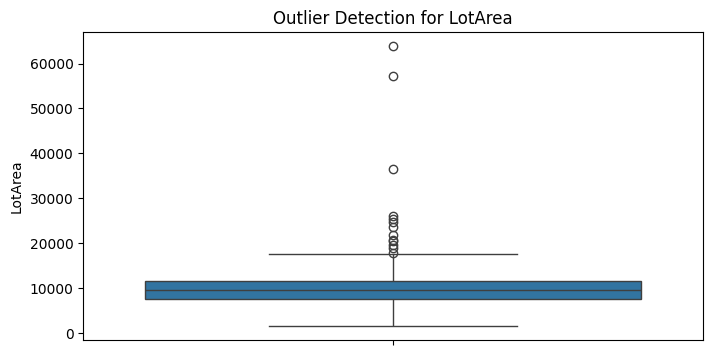

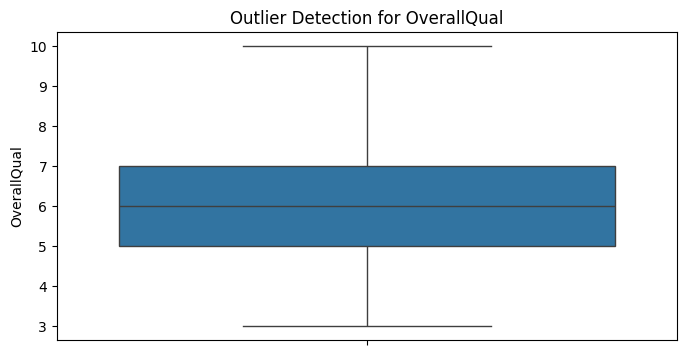

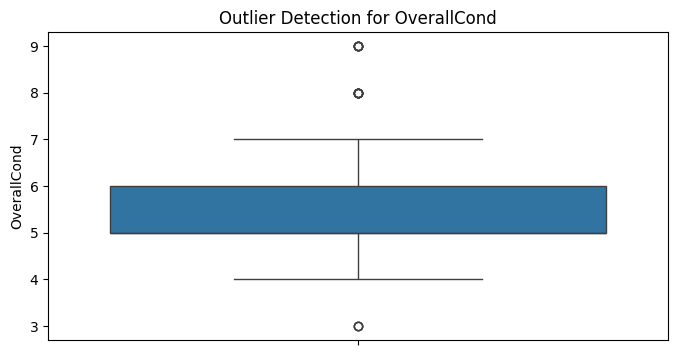

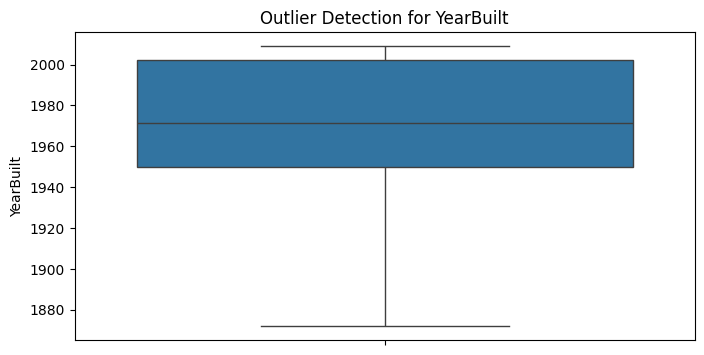

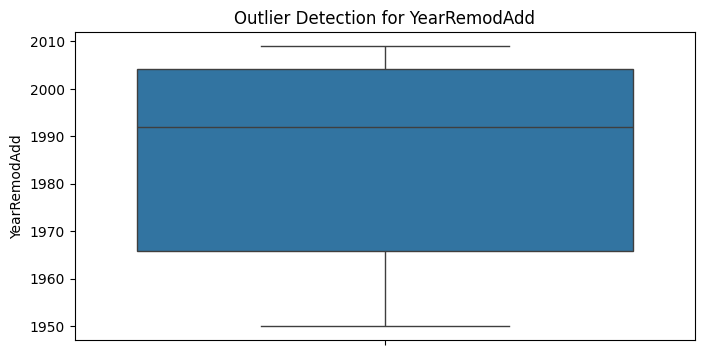

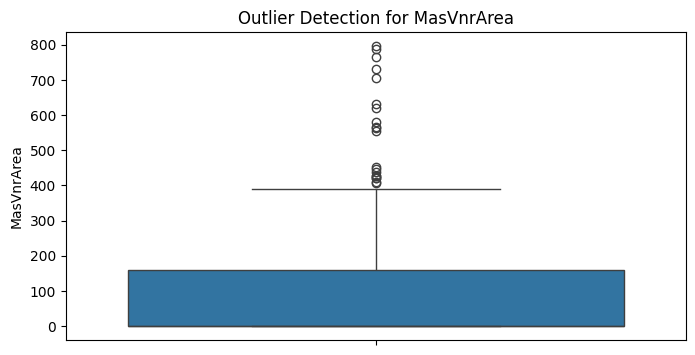

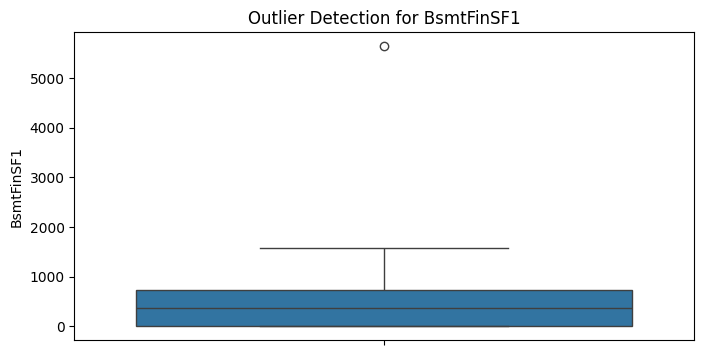

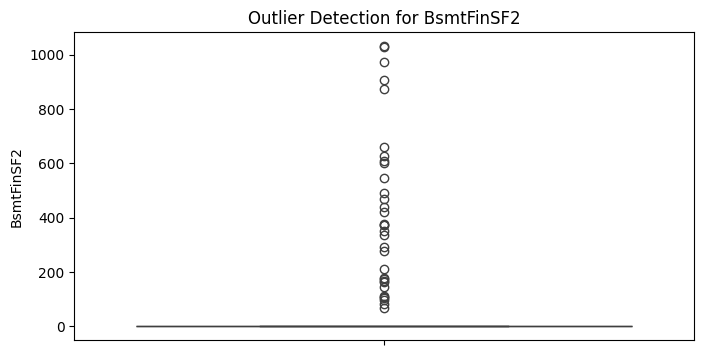

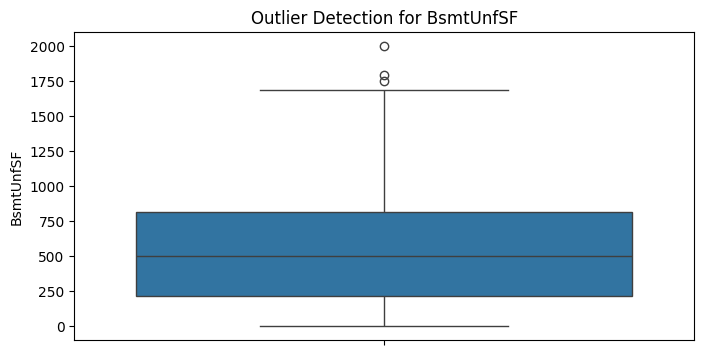

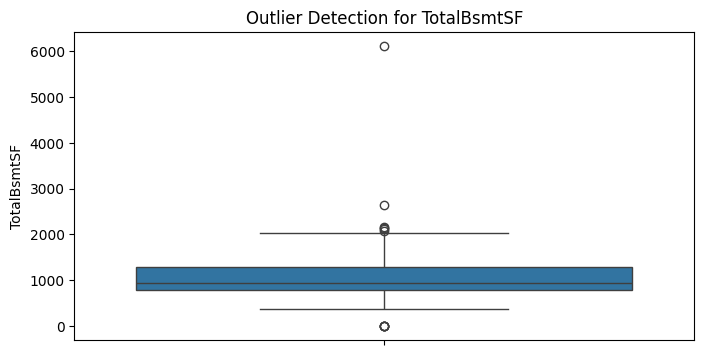

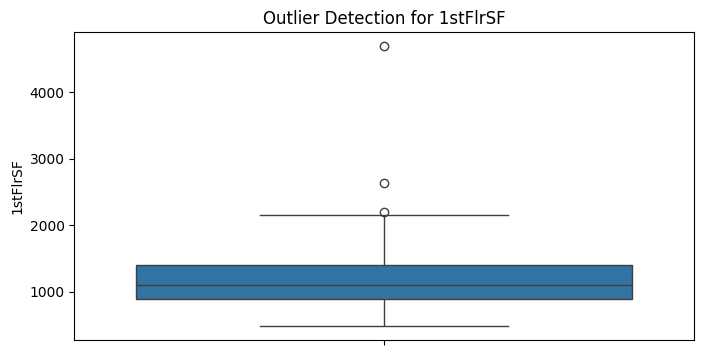

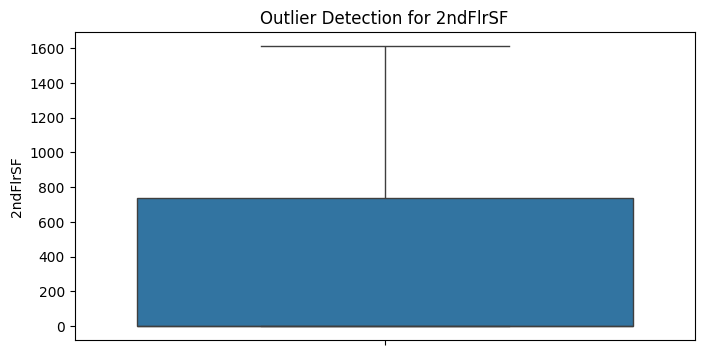

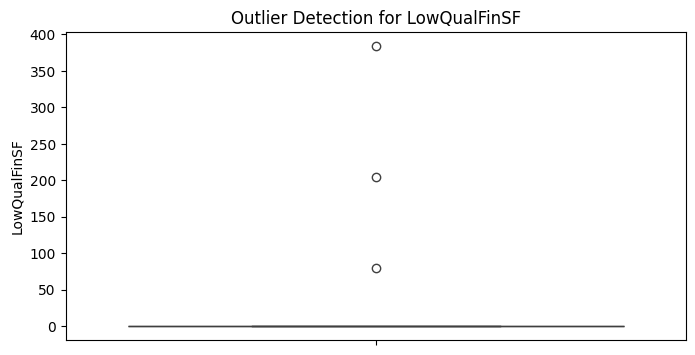

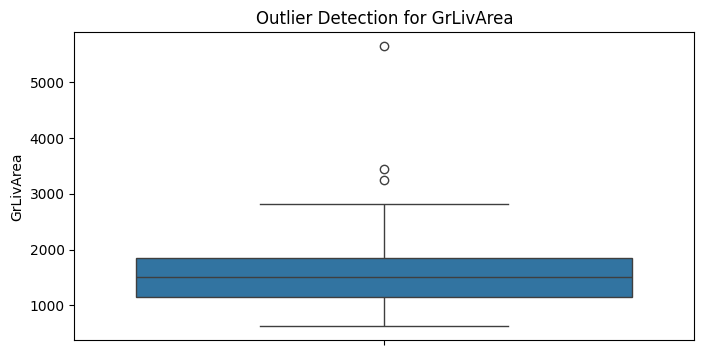

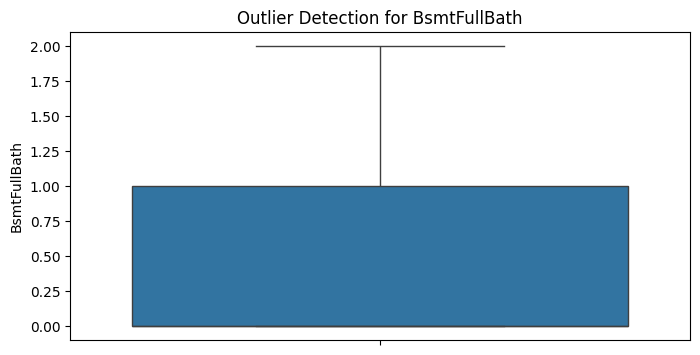

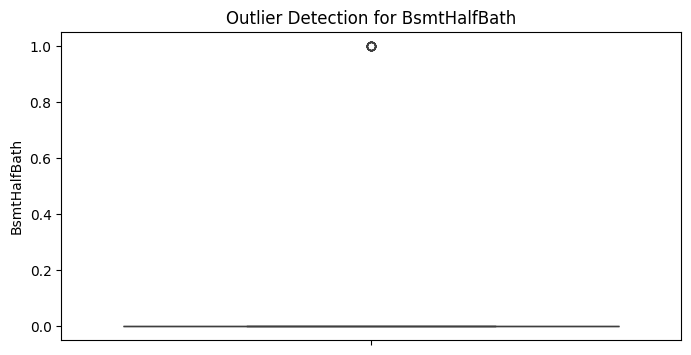

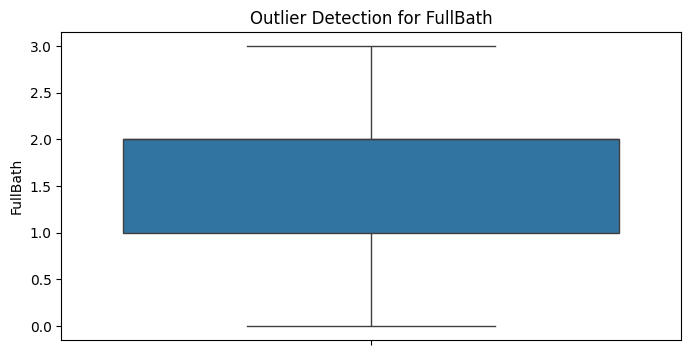

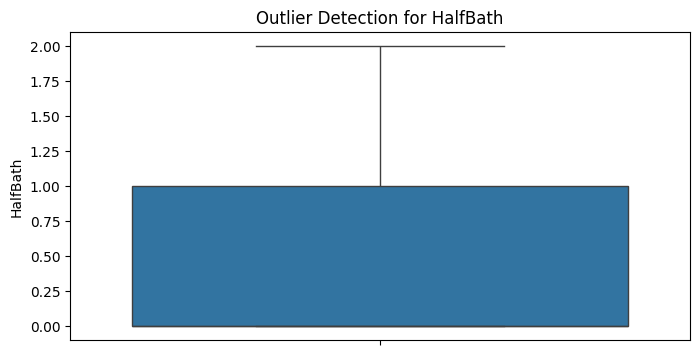

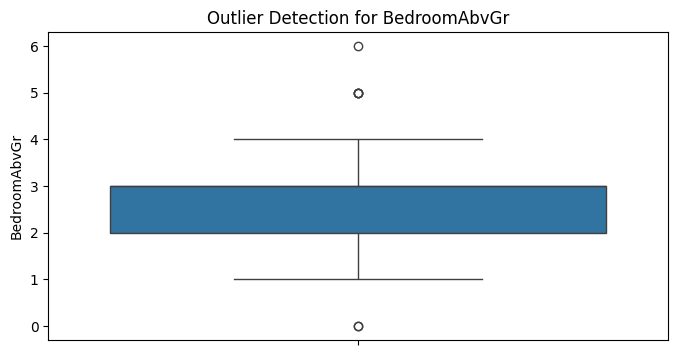

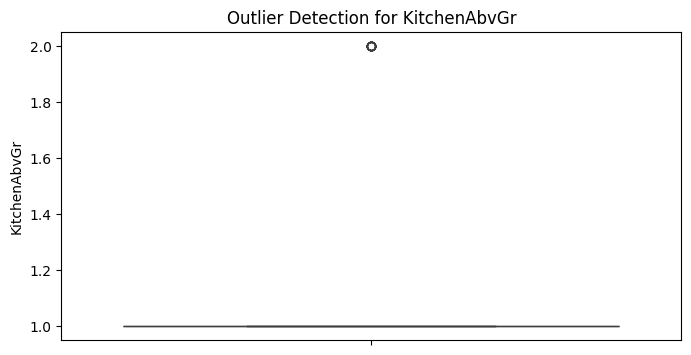

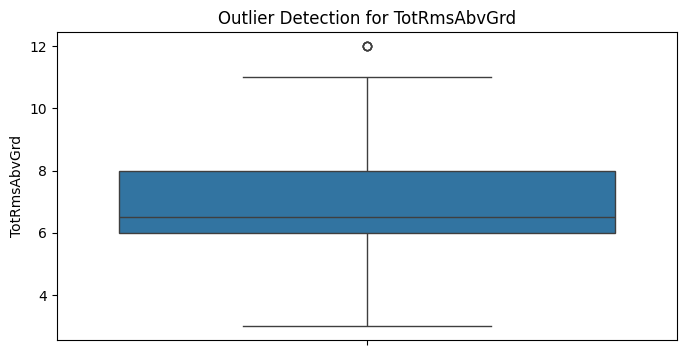

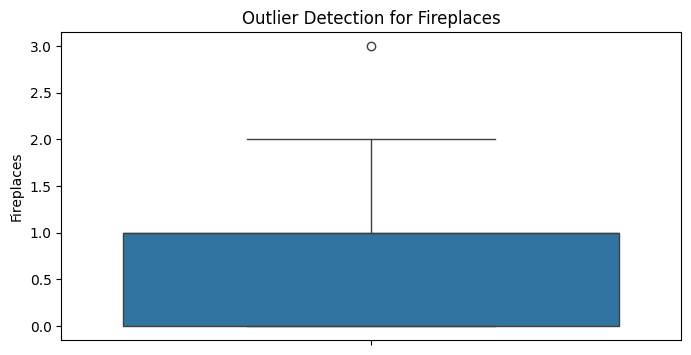

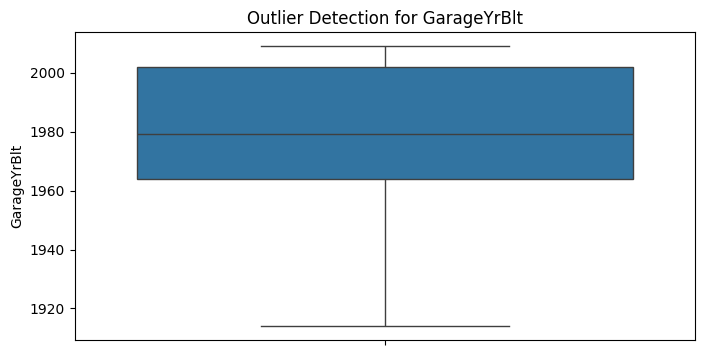

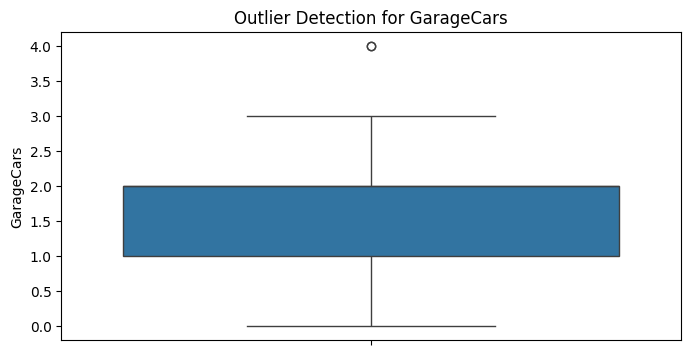

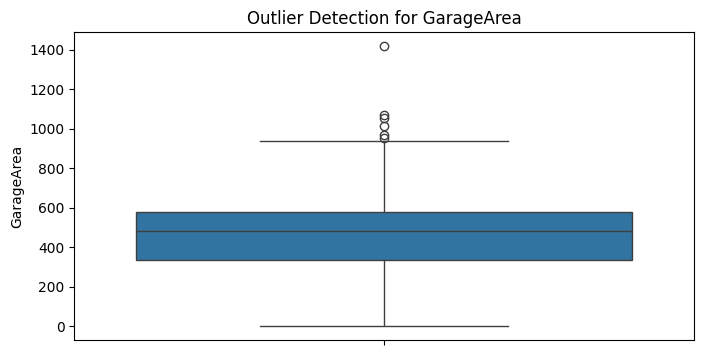

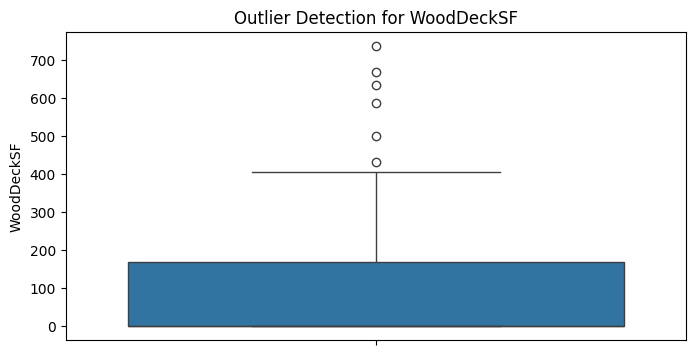

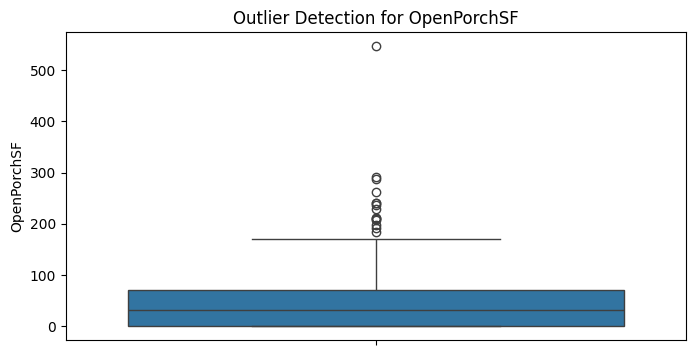

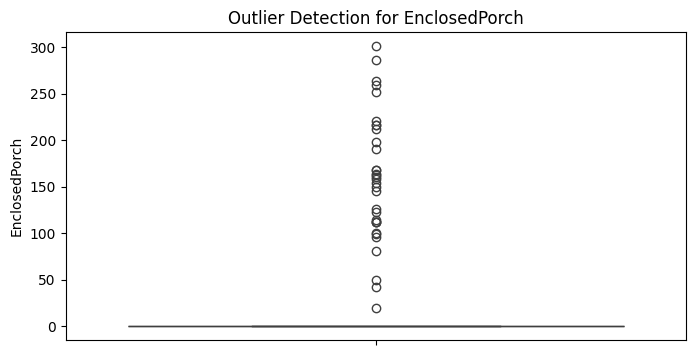

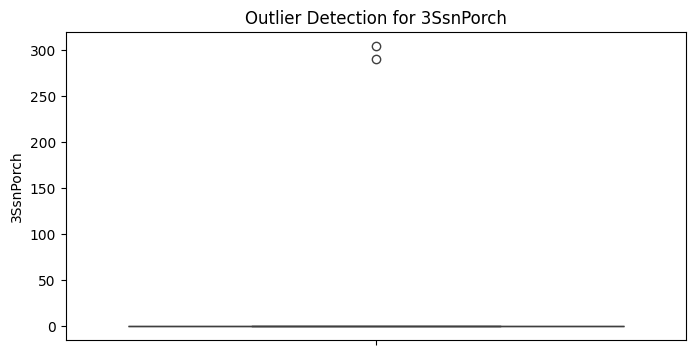

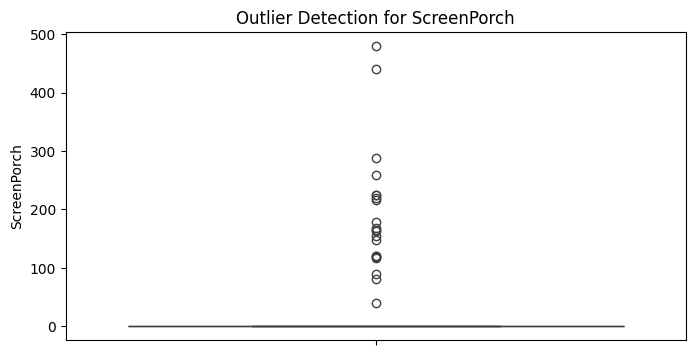

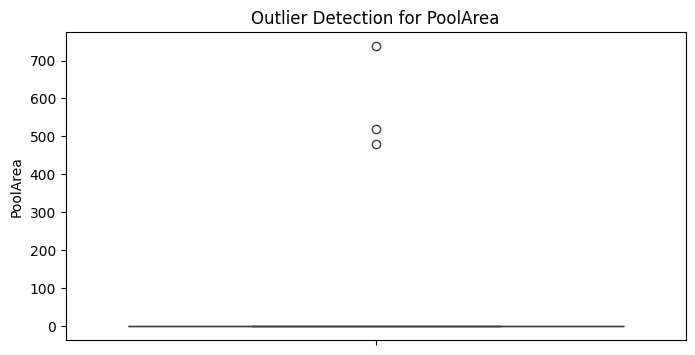

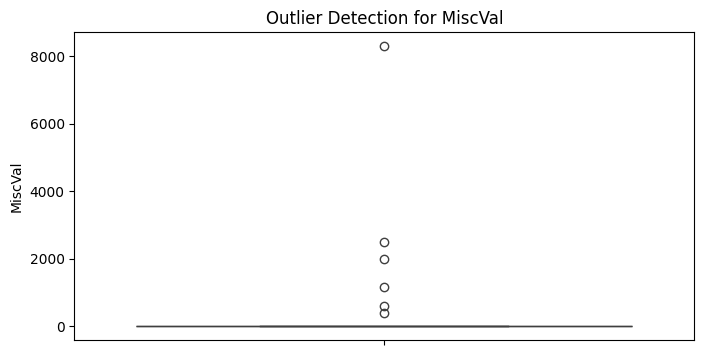

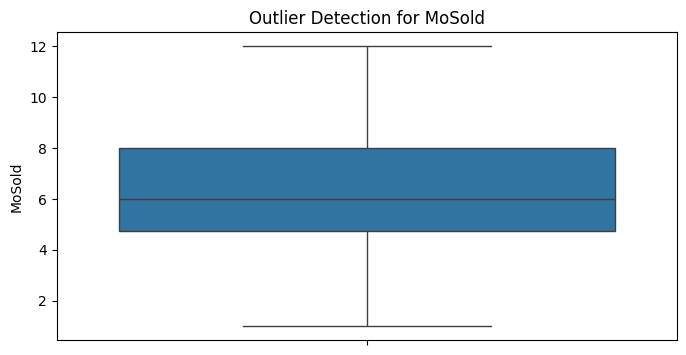

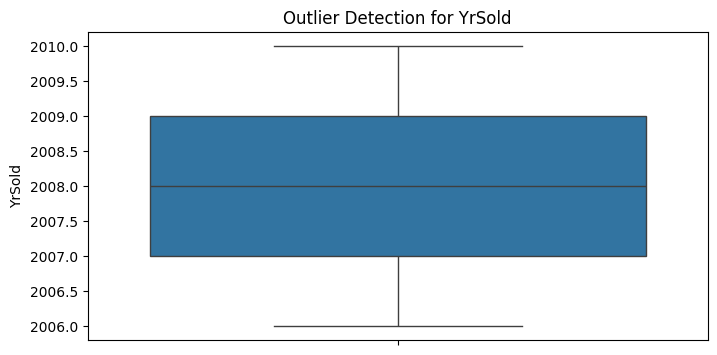

In [5]:
def detect_outliers(data, numerical_cols):
    for col in numerical_cols:
        plt.figure(figsize=(8, 4))
        sns.boxplot(data[col])
        plt.title(f'Outlier Detection for {col}')
        plt.show()

# Check for Outliers
print("Outlier detection for training dataset:")
detect_outliers(train_data, train_num_cols)

print("Outlier detection for test dataset:")
detect_outliers(test_data, test_num_cols)

In [6]:
# Multi-Collinearity Check
def check_multicollinearity(data, numerical_cols):
    print("Calculating VIF...")
    vif_data = pd.DataFrame()
    vif_data['Feature'] = numerical_cols
    vif_data['VIF'] = [variance_inflation_factor(data[numerical_cols].values, i) for i in range(len(numerical_cols))]
    return vif_data

print("Checking multi-collinearity for training dataset:")
train_vif = check_multicollinearity(train_data, train_num_cols)
print(train_vif)

print("Checking multi-collinearity for test dataset:")
test_vif = check_multicollinearity(test_data, test_num_cols)
print(test_vif)

Checking multi-collinearity for training dataset:
Calculating VIF...


e:\College\College notes\Semester-6 notes\MLA\Class Work\venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


          Feature           VIF
0              Id  4.111773e+00
1      MSSubClass  4.791422e+00
2     LotFrontage  1.747939e+01
3         LotArea  2.683717e+00
4     OverallQual  7.663327e+01
5     OverallCond  4.229356e+01
6       YearBuilt  2.161914e+04
7    YearRemodAdd  2.249515e+04
8      MasVnrArea  1.896401e+00
9      BsmtFinSF1           inf
10     BsmtFinSF2           inf
11      BsmtUnfSF           inf
12    TotalBsmtSF           inf
13       1stFlrSF           inf
14       2ndFlrSF           inf
15   LowQualFinSF           inf
16      GrLivArea           inf
17   BsmtFullBath  3.727956e+00
18   BsmtHalfBath  1.219717e+00
19       FullBath  2.670312e+01
20       HalfBath  3.422408e+00
21   BedroomAbvGr  3.186217e+01
22   KitchenAbvGr  3.774926e+01
23   TotRmsAbvGrd  8.451359e+01
24     Fireplaces  3.031030e+00
25    GarageYrBlt  2.297554e+04
26     GarageCars  3.716455e+01
27     GarageArea  3.224450e+01
28     WoodDeckSF  1.919480e+00
29    OpenPorchSF  1.825630e+00
30  Encl

e:\College\College notes\Semester-6 notes\MLA\Class Work\venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [8]:
y_train = train_data['SalePrice']
X_train = train_data.drop(columns=['SalePrice'])

In [9]:
common_columns = X_train.columns.intersection(test_data.columns)
X_train = X_train[common_columns]
X_test = test_data[common_columns]

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [12]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"Training RMSE: {train_rmse}")

Training RMSE: 25116.380813078133


In [13]:
print("Predicted house prices for the test dataset:")
print(y_test_pred)

Predicted house prices for the test dataset:
[138591.39459097 251823.00894286 118723.71886042 217059.42550312
 146297.48902387 298102.75651127 200051.47834769 180500.95254857
  95034.60239281 141044.89025396 125579.58200844 100869.75123512
 110938.98786023 237196.73231209  64707.98961975  93704.24308925
  96910.0695808  116111.34173338 167427.89294369 145482.01013341
 209635.01842229 143746.2596287  232858.62311179 153815.65254143
 346859.9384865  131842.39546678 190024.10060787 131929.71586086
  75605.13629463 136204.07922728 120461.16604995 153888.42132104
 171973.62011086 212665.73210081 134901.36972703 246494.46423053
 211751.18428622 242256.47503266 178637.2345815  407981.52388835
 207322.79927409 215320.79094324 206774.39945378 148420.58478971
 126388.71810532 126062.96226478 274480.97451416 188891.00813517
 111836.75683125 276385.84058485 180539.49505594 128363.15650042
 318620.19301748  87676.80218777 207741.08398856 148228.11386977
 170448.82657983 120237.14380129 148994.48108

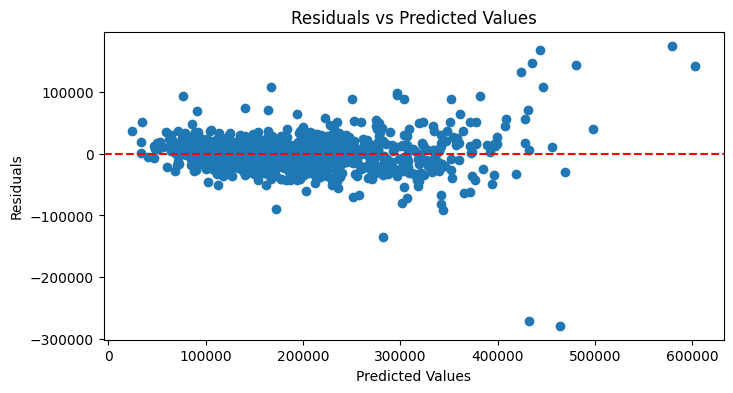

In [14]:
import matplotlib.pyplot as plt
residuals = y_train - y_train_pred
plt.figure(figsize=(8, 4))
plt.scatter(y_train_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()
